In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Configurar estilo general
plt.style.use('classic')

In [7]:
# Definir funciones
x = sp.symbols('x')
f = sp.lambdify(x, x**3 - 6*x, 'numpy')

def f2(x, y):
    return x**2 + y**2 + 4*x*y

# Crear la cuadrícula de puntos
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f2(X, Y)

# Puntos críticos
x_crit = [-sp.sqrt(2), sp.Integer(0), sp.sqrt(2)]
y_crit = [f(cp.evalf()) for cp in x_crit]

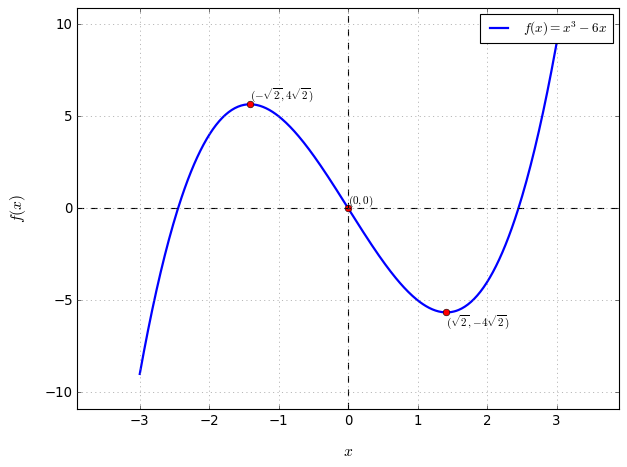

In [8]:
def configurar_grafico(ax, xlabel, ylabel, xlim, ylim,
    xticks=True, yticks=True):
    ax.set_xlabel(xlabel, fontsize=14, labelpad=15)
    ax.set_ylabel(ylabel, fontsize=14, labelpad=15)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.axhline(0, color='black', lw=1, ls='--')
    ax.axvline(0, color='black', lw=1, ls='--')
    ax.grid(color='gray', linewidth=0.5)
    if not xticks:
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: ''))
    if not yticks:
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: ''))

# Gráfica de f(x) = x³ - 6x
def graficar_funcion():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x_vals, f(x_vals), label=r'$f(x) = x^3 - 6x$', color='blue',
        linewidth=2)
    
    # Graficar puntos críticos
    for i, xc in enumerate(x_crit):
        yc = f(xc)
        ax.plot(float(xc), yc, 'ro', markersize=6)
        x = 1 if i >= 2 else 0
        plt.text(float(xc), yc - x,
            f'$({{{sp.latex(xc)}}}, {{{sp.latex(yc)}}})$', fontsize=10,
            ha='left', va='bottom', color='black')
    
    # Configuración y etiquetas
    configurar_grafico(ax, r'$x$', r'$f(x)$', [-3.9, 3.9], [-10.9, 10.9])
    ax.legend(fontsize=12)

    fig.patch.set_facecolor('white')
    plt.tight_layout()
    plt.savefig("graficas/grafica_2d.png", dpi=300, bbox_inches='tight',
        transparent=True)
    plt.show()

os.mkdir("graficas")
graficar_funcion()

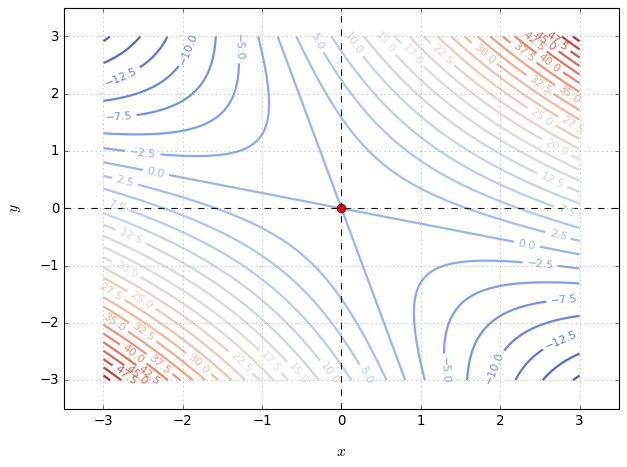

In [9]:
# Gráfica de contorno f(x, y) = x^2 + y^2 + 4xy
def graficar_contorno():
    fig, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contour(X, Y, Z, levels=30, cmap="coolwarm", linewidths=2)
    ax.clabel(contour, inline=True, fontsize=10)

    # Graficar punto crítico (0, 0)
    x_crit, y_crit = 0, 0
    ax.plot(x_crit, y_crit, 'ro', markersize=8)

    # Configuración y etiquetas
    configurar_grafico(ax, r'$x$', r'$y$', [-3.5, 3.5], [-3.5, 3.5])
    
    fig.patch.set_facecolor('white')
    plt.tight_layout()
    plt.savefig("graficas/grafica_contorno.png", dpi=300, bbox_inches='tight',
        transparent=True)
    plt.show()

graficar_contorno()

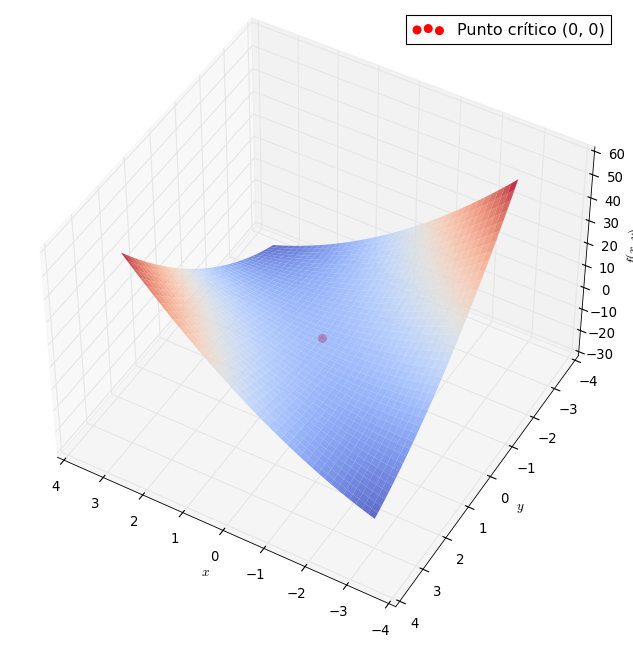

In [10]:
# Gráfica 3D de f(x, y) = x^2 + y^2 + 4xy
def graficar_3d():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar la superficie
    surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none',
        alpha=0.8)

    # Punto crítico (0, 0)
    ax.scatter(0, 0, f2(0, 0), color='red', s=50, marker='o',
        label="Punto crítico (0, 0)", zorder=5)

    # Configuración de ejes y ángulo
    ax.set_xlabel(r'$x$', fontsize=12)
    ax.set_ylabel(r'$y$', fontsize=12)
    ax.set_zlabel(r'$f(x, y)$', fontsize=12)
    ax.view_init(elev=45, azim=120)
    
    # Añadir título y leyenda
    ax.legend()

    fig.patch.set_facecolor('white')
    plt.tight_layout()
    plt.savefig("graficas/grafica_3d.png", dpi=300, bbox_inches='tight',
        transparent=True)
    plt.show()

graficar_3d()